In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#seaborn은 시각화하기 위한 가장 좋은 특징
import seaborn as sns

# pandas - 데이터 처리와 분석을 위한 라이브러리
# pandas의 DataFrame은 엑셀과 같은 테이블 형태
# matplotlib - 과학 계산용 그래프 라이브러리 (선 그래프, 히스토그램, 산점도 등)
# numpy - 과학 계산  (다차원 '배열'을 위한 기능, 선형대수연산, 푸리에 변환 같은 고소준 수학 함수와 유사난수 생성기 포함)
# sklearn - 여러가지 머신러닝 알고리즘이 있는 라이브러리

In [ ]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()
# 768행 9열 (내가 예측하고 싶은 것에 y. y와 관련된 데이터로는 무엇이 있을까? 그건 x)
#non-null 있는지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


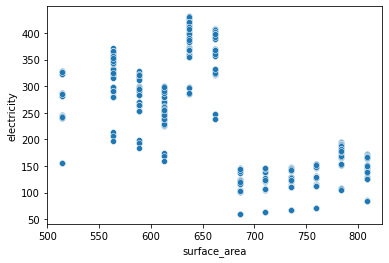

In [ ]:
# 데이터프레임dp []하면 series가 된다
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

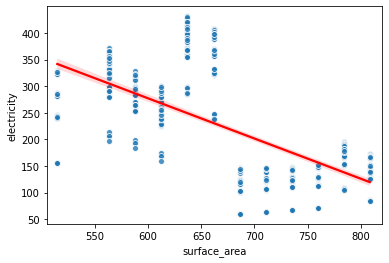

In [ ]:
# reg = regression 예측
sns.regplot(x='surface_area', y='electricity', data=Elec, 
            line_kws = {'color':'red'},
            scatter_kws={'edgecolor':'white'}) # 동그라미(scatter)의 edge 색깔
plt.xlim(505,820)
plt.show()

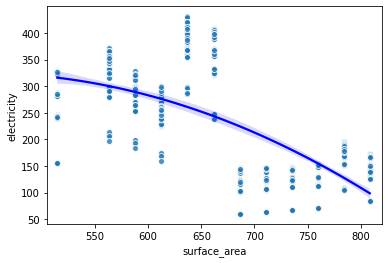

In [ ]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws = {'color':'blue'},
            scatter_kws={'edgecolor':'white'},
            order = 2)
plt.xlim(505,820)
plt.show()

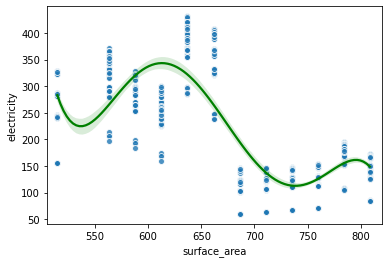

In [ ]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws = {'color':'green'},
            scatter_kws={'edgecolor':'white'},
            order = 5)
plt.xlim(505,820)
plt.show()

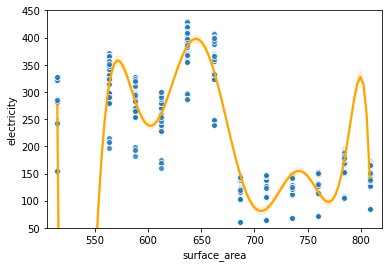

In [ ]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws = {'color':'orange'},
            scatter_kws={'edgecolor':'white'},
            order = 9)
plt.xlim(505,820)
plt.ylim(50,450)
plt.show()

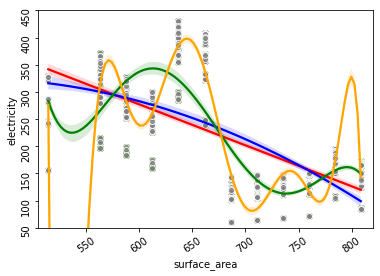

In [ ]:
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'red'})
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'blue'}, order =2)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'green'}, order =5)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'orange'}, order =9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505,820)         
plt.ylim(50, 450)
plt.xticks(rotation =35)
plt.yticks(rotation = 90)
plt.show()


In [ ]:
def reg_plot(x):
  sns.regplot(x='surface_area',
              y = 'electricity',
              data=Elec,
              order=x,
              line_kws={'color':'red'},
              scatter_kws={'edgecolor':'white'})
  
  plt.xlim(505, 820)
  plt.ylim(50, 450)
  plt.show()

In [ ]:
# ipywidegs의 interact는 함수의 차수를 바꾸기 쉬운. django연결도 가능
from ipywidgets import interact

order = [1,2,5,9]
interact(reg_plot, x=order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5, 9), value=1), Output()), _dom_classes=('widg…

<function __main__.reg_plot>

## Training Error

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [18]:
# X축(대문자) y축(소문자)
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [19]:
type(Elec)

pandas.core.frame.DataFrame

In [20]:
type(Elec['surface_area'])

pandas.core.series.Series

In [22]:
type(Elec[['surface_area']])

pandas.core.frame.DataFrame

### sklearn은 데이터프레임으로 넣어야 가능. or numpy array형태이거나
<p>series = ------------- 이렇게 768개 (series는 데이터프레임 형태X)
<p>sklearn은 x를 세로형태로 받아야.
<p> 그래서 array.reshape로 만들던가.
array.reshape(-1,1)
<p> -1은 값이 어느정도인지 모를 때 사용. 가지고 있는 값의 형태로 전부 넣는. 



In [ ]:
# 책 - 선형모델 파트
from sklearn.linear_model import LinearRegression

#LinearGegression() - 함수 - 기본적으로 1차함수 제공
Model_1 = LinearRegression()

# 주어진 x,y를(X_train, y_train) Model_1(=LinearRegression)함수에 
#fit(맞추는 것) w,b를 뽑아내겠지(1차니까 하나씩이겠지) - 기울기가 0인지점
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# coef = w, intercept = b
print(Model_1.coef_)
print(Model_1.intercept_)
# w가 음의 방향이니까 b의 값이 커짐

[-0.75387157]
729.4538243006992


In [ ]:
# predict - x값을 집어넣어서 y_hat(예측)값을 뽑아내는 함수/ 
# 학습된 값을 넣어서 예측값으로 뽑아내는 함수 
# 실제 y값과 fit으로 예측한 식에 적용되는 y예측값은 다를
y_hat_1 = Model_1.predict(X_train)

#(X_train 이 768개 들어가니까 y_hat도 768개 나오겠지)
len(y_hat_1)

768

In [ ]:
# MSE 계산
TR_Err_1 = np.mean((y_train - y_hat_1)**2)
TR_Err_1

5763.983779426347

# 5차 모델(다항차수 변환)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias = False)

#PX_5 = x의 차수가 5개인 5차식
PX_5 = poly.fit_transform(X_train) # x 차수를 기준으로 변환

In [ ]:
# w(coef) = 5개 b(intercept)=1 전체 6개 파라미터
PX_5  

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [ ]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [ ]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
np.set_printoptions(suppress = True, precision = 10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


In [ ]:
# y 예측값도 동일하게 차수 변환해서 

PX_5_pred = poly.fit_transform(X_train)

#predict 예측값
y_hat_5 = Model_5.predict(PX_5_pred)
y_hat_5.shape

(768,)

In [ ]:
TR_Err_5 = np.mean((y_train - y_hat_5) **2)
TR_Err_5

4177.726328606075

# 9차 다항식

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(X_train)

In [ ]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

In [ ]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


In [ ]:
PX_9_pred = poly.fit_transform(X_train)
y_hat_9 = Model_9.predict(PX_9_pred)
y_hat_9.shape

(768,)

In [ ]:
TR_Err_9=np.mean((y_train - y_hat_9) **2)
TR_Err_9

4086.7199908150374

In [ ]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426347
5차 모델 :  4177.726328606075
9차 모델 :  4086.7199908150374


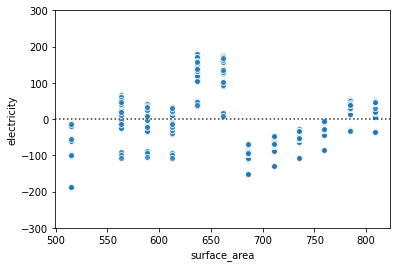

In [ ]:
sns.residplot(x='surface_area',
              y='electricity',
              data=Elec,
              order=1,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300,  300)
plt.show()

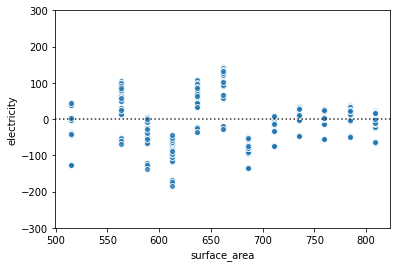

In [ ]:
sns.residplot(x='surface_area',
              y='electricity',
              data=Elec,
              order=5,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300,  300)
plt.show()

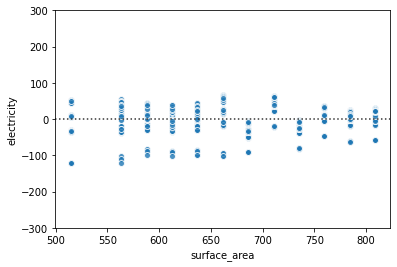

In [ ]:
sns.residplot(x='surface_area',
              y='electricity',
              data=Elec,
              order=9,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300,  300)
plt.show()

In [ ]:
sklearn은 다항식 사용을 위한 패키지

polynomia~ 다항식 변형?
poly = 단순히 객체



행렬 계산을 통해 한번에 오차의 최적값의 연산식을 만드는

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Elec=pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.shape

(768, 9)

In [ ]:
#train_test_split = 데이터를 쪼개는 class. 트레이닝 데이터 vs 테스트 데이터

from sklearn.model_selection import train_test_split

# test_size = 20% 데이터 -random split으로 쪼개짐 but, random_state값을 정해놓으면 랜덤X (실험 복원을 위해서도 똑같은 형태로 쪼개짐)
TR_Elec, TE_Elec = train_test_split(Elec, test_size=0.2, random_state =2045)

TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [ ]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [ ]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec['surface_area'], Elec['electricity'],
                                                    test_size= 0.2, random_state=2045)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 1), (614,), (154, 1), (154,))

In [ ]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [ ]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


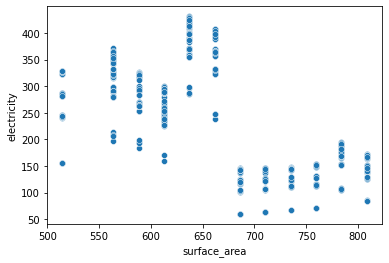

In [ ]:
sns.scatterplot(TR_Elec['surface_area'],TR_Elec['electricity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


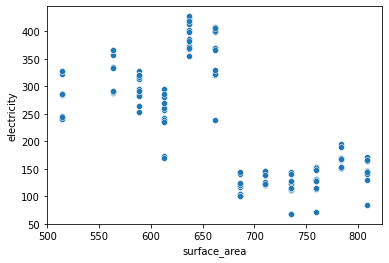

In [ ]:
sns.scatterplot(TE_Elec['surface_area'],TE_Elec['electricity'])
plt.show()

In [ ]:
sns.scatterplot(X_train.shape, y_train.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
Model_1 = LinearRegression()

#fit( train 데이터) pridict(test 데이터)
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#pridict(test 데이터)
y_hat_1 = Model_1.predict(X_test)
y_hat_1.shape

(154,)

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
# fit = 학습시키기
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
PX_5_TE=poly.fit_transform(X_test)
y_hat_5 = Model_5.predict(PX_5_TE)

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

# training error는 확인 X test데이터로 에러 확인

4330.604566409499

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias= False)
PX_9_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137633

In [ ]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409499
9차 모델 :  4238.689067137633


# Validation Approach

In [1]:
import pandas as pd

In [2]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [9]:
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'],
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [15]:
type(X_remain)

pandas.core.frame.DataFrame

In [ ]:
tye(X_remain[])

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [12]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
PX_5_VD = poly.fit_transform(X_valid)
y_hat_5 = Model_5.predict(PX_5_VD)

In [14]:
from sklearn.metrics import mean_squared_error
MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.4312593408395

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

In [24]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
PX9_valid = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX9_valid)

In [29]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3901.4314136498806

In [30]:
print('5차 모델 MSE_5 : ', MSE_5)
print('9차 모델 MSE_9 : ', MSE_9)

5차 모델 MSE_5 :  4136.4312593408395
9차 모델 MSE_9 :  3901.4314136498806


In [31]:
PX9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test, Model_9.predict(PX9_TE))

4225.170621973846

In [ ]:
arry split은 x, y만 정해놓음

In [ ]:
len(Elec) * 0.2 = Elec에서 20%의 개수를 test로, 나머지는 ramain으로. /남은 remain에서 또 다시 원본의 20%를 빼고 나머지를 train으로
